# Loading Dependencies

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [56]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

# Data Description

In [4]:
df=pd.read_csv(r'C:\Users\sudip\ICG02\venv\dataset\AER_credit_card_data.csv')
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [8]:
df.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [9]:
df.shape

(1319, 12)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
card,1319.0,0.775588,0.417353,0.000000,1.000000,1.000000,1.000000,1.00000
reports,1319.0,0.456406,1.345267,0.000000,0.000000,0.000000,0.000000,14.00000
age,1319.0,33.213103,10.142783,0.166667,25.416670,31.250000,39.416670,83.50000
income,1319.0,3.365376,1.693902,0.210000,2.243750,2.900000,4.000000,13.50000
share,1319.0,0.068732,0.094656,0.000109,0.002316,0.038827,0.093617,0.90632
expenditure,1319.0,185.057071,272.218917,0.000000,4.583333,101.298300,249.035800,3099.50500
dependents,1319.0,0.993935,1.247745,0.000000,0.000000,1.000000,2.000000,6.00000
months,1319.0,55.267627,66.271746,0.000000,12.000000,30.000000,72.000000,540.00000
majorcards,1319.0,0.817286,0.386579,0.000000,1.000000,1.000000,1.000000,1.00000
active,1319.0,6.996967,6.305812,0.000000,2.000000,6.000000,11.000000,46.00000


In [5]:
mapping={'yes' :1,'no':0}
df['card']=df['card'].map(mapping)

In [14]:
df.rename(columns={'card':'target'},inplace=True)

In [15]:
df.columns

Index(['target', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [13]:
df['card'].value_counts()

card
1    1023
0     296
Name: count, dtype: int64

In [18]:
df_numeric=df[[col for col in df.columns if col not in['owner','selfemp']]]

In [19]:
df_numeric.columns

Index(['target', 'reports', 'age', 'income', 'share', 'expenditure',
       'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

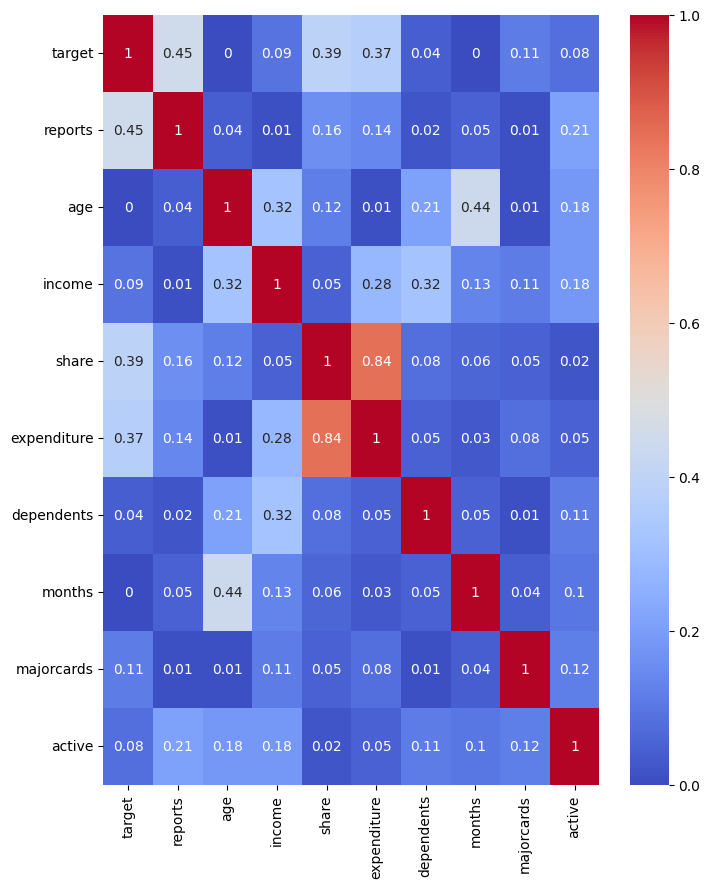

In [28]:
correlation_matrix=df_numeric.corr().abs().round(2)
plt.figure(figsize=(8,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

# Data-Preprocessing

In [ ]:
def outlier_removal(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    return df.shape[0]-df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].shape[0]

In [ ]:
for col in df_numeric.columns:
    print(f"Number of outliers in {col}:{outlier_removal(df_numeric,col)}")            

Number of outliers in target:296
Number of outliers in reports:259
Number of outliers in age:28
Number of outliers in income:77
Number of outliers in share:74
Number of outliers in expenditure:75
Number of outliers in dependents:7
Number of outliers in months:95
Number of outliers in majorcards:241
Number of outliers in active:18


That means we cannot remove the outliers as they consume a descent fraction of the total dataset

# Random Forest Model

In [37]:
df_numeric.columns

Index(['target', 'reports', 'age', 'income', 'share', 'expenditure',
       'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [39]:
features=[col for col in df_numeric.columns if col not in ['target']]
x=df_numeric[features]
y=df_numeric['target']

In [61]:
le=LabelEncoder()
y_encoded=le.fit_transform(y)

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y_encoded,test_size=0.2,random_state=42)

In [63]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [64]:
model_rf=RandomForestClassifier(n_estimators=100,random_state=42)
model_rf.fit(x_train_scaled,y_train)
y_prediction=model_rf.predict(x_test_scaled)

In [65]:
confusion_matrix(y_test,y_prediction)

array([[ 62,   0],
       [  6, 196]])

In [66]:
accuracy_score=model_rf.score(x_test_scaled,y_test)
print(accuracy_score)

0.9772727272727273


<Axes: >

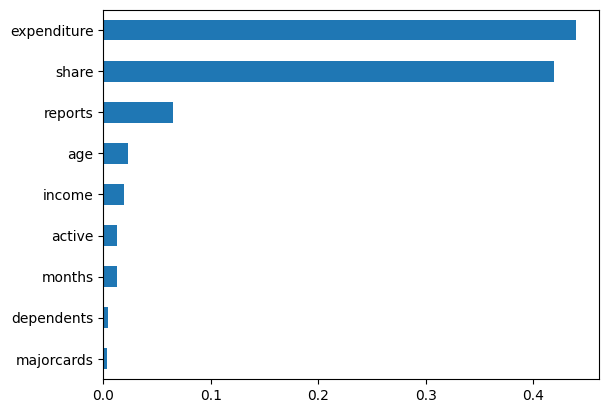

In [67]:
pd.Series(model_rf.feature_importances_, index = x_train.columns).sort_values().plot.barh()